In [1]:
# For Data
import pandas as pd
from pandas import Series,DataFrame

import numpy as np

In [2]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import requests
import io
from io import StringIO

In [4]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [5]:
poll_df = pd.read_csv(poll_data)

In [6]:
poll_df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,https://elections.huffingtonpost.com/pollster/...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,https://elections.huffingtonpost.com/pollster/...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

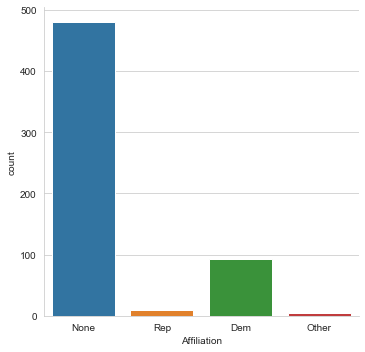

In [8]:
sns.catplot('Affiliation',data=poll_df, kind='count',legend=True)

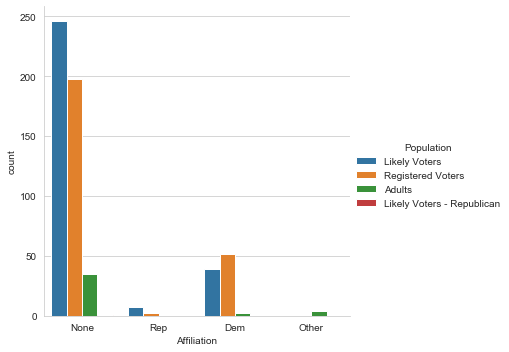

In [9]:
sns.catplot('Affiliation', data = poll_df, hue='Population', kind='count')

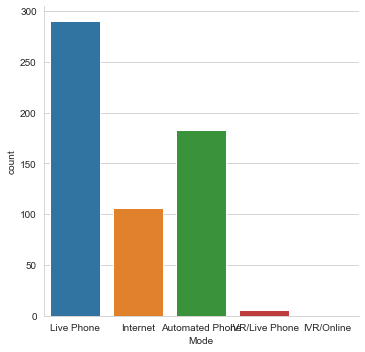

In [10]:
sns.catplot('Mode', data=poll_df, kind='count')

In [11]:
avg = DataFrame(poll_df.mean())

In [12]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [13]:
avg.drop(['Number of Observations','Question Text', 'Question Iteration'], axis =0,inplace=True)

In [14]:
std = DataFrame(poll_df.std())

In [15]:
std.drop(['Number of Observations','Question Text', 'Question Iteration'], axis =0, inplace=True)

In [16]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


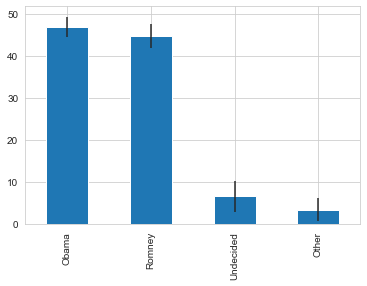

In [17]:
# yerr => y error

avg.plot(yerr=std, kind='bar', legend=False)

In [18]:
poll_avg = pd.concat([avg,std], axis=1)

poll_avg.columns = ['Average', "STD"]

poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [19]:
poll_df.head(5)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


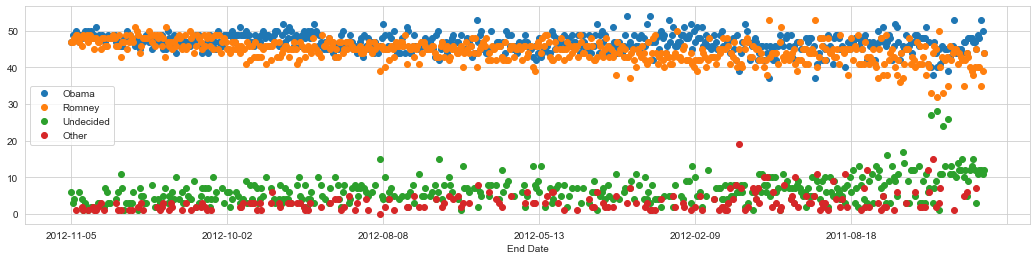

In [20]:
 poll_df.plot(x='End Date', y=['Obama', 'Romney', "Undecided", "Other"], linestyle='', marker='o', figsize=(18,4))

In [21]:
from datetime import datetime

In [22]:
poll_df["Difference"] = (poll_df["Obama"] - poll_df["Romney"]) / 100

poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.09
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.08
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.18
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.11


In [23]:
## (+) difference means polls are leaning towards Obama , (-) means Romney

##  as_index = False means it keeps the original index number

poll_df = poll_df.groupby(["Start Date"],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


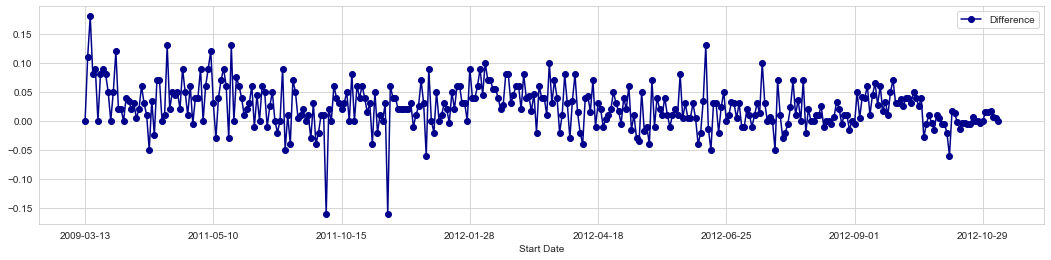

In [24]:
 poll_df.plot('Start Date', "Difference", figsize=(18,4), marker='o', linestyle='-', color='darkblue')

In [25]:
romney_dates_df = poll_df[['Start Date','Difference']].groupby(["Difference"], as_index=False).min()

romney_dates_df

,Difference,Start Date
0,-0.160,2011-10-05
1,-0.060,2011-12-27
2,-0.050,2010-10-27
3,-0.040,2011-08-29
4,-0.035,2012-05-07
...,...,...
65,0.100,2012-02-07
66,0.110,2009-04-17
67,0.120,2010-01-12
68,0.130,2011-01-06


In [26]:
## Checking for the October '12 (a month before 2012 election)

row_in =0
xlimit= []

for date in poll_df["Start Date"]:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        


print( min(xlimit))
print( max(xlimit))

325
352


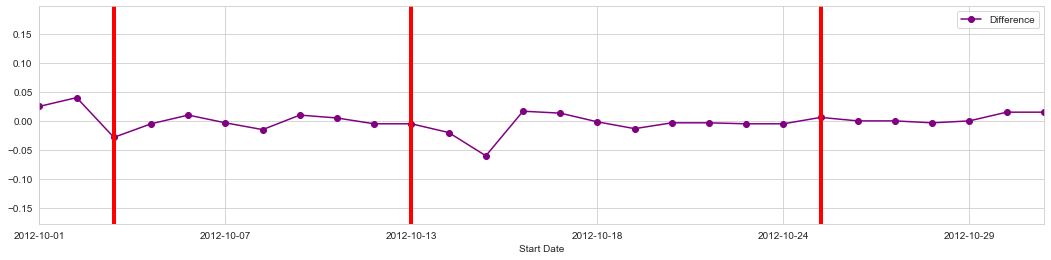

In [27]:
poll_df.plot('Start Date', "Difference", figsize=(18,4), marker='o', linestyle='-', color='purple', xlim=(min(xlimit),max(xlimit)))

## I will indicate the debate dates on the graph
# October 3rd
plt.axvline(x= min(xlimit)+2, linewidth=4,color='red')
# October 11th
plt.axvline(x= min(xlimit)+10, linewidth=4,color='red')
# October 22nd
plt.axvline(x= min(xlimit)+21, linewidth=4,color='red')

## Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

In [28]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/ozlemniksch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [30]:
donor_df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


#### 1.) How much was donated and what was the average donation?

In [31]:
donation_total =  donor_df['contb_receipt_amt'].sum()
donation_avg = donor_df['contb_receipt_amt'].mean()
donation_std = donor_df['contb_receipt_amt'].std()

In [32]:
print(donation_total)
print(donation_avg)
print(donation_std)
print ( 'The avarage donation was %.2f with a std of %.2f' %(donation_avg, donation_std))

298751395.14000005
298.2351500951093
3749.666723269043
The avarage donation was 298.24 with a std of 3749.67


In [33]:
## It is a huge standarsd deviation! Let's see if there are any large donations or other factors messing with the distribution
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort')

#top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [34]:
top_donor = top_donor[top_donor>0]

top_donor.sort_values(ascending=False).head(10)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
114754      33300.00
217891      25800.00
823345      25000.00
Name: contb_receipt_amt, dtype: float64

In [35]:
## Most common donations value counts 
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

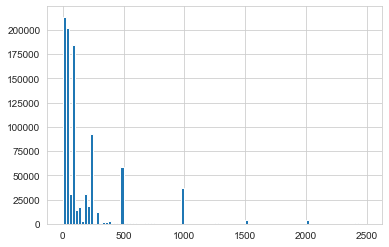

In [36]:
## Create a Series of the common donations limitied to 2500$ 
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

##### Extra Question :
Which state donate how much money?

In [37]:
# it does not run, i assume because of the size of the dataset
# sns.catplot('contb_receipt_amt',data=donor_df, hue='contbr_st',kind='count')

In [38]:
state_donor = donor_df[['contbr_st','contb_receipt_amt']]

state_donor.head(10)

,contbr_st,contb_receipt_amt
0,AL,250.0
1,AL,50.0
2,AL,250.0
3,AR,250.0
4,AR,300.0
5,AR,500.0
6,AR,250.0
7,AR,250.0
8,AZ,250.0
9,AZ,250.0


In [39]:
state_donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 2 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   contbr_st          1001727 non-null  object 
 1   contb_receipt_amt  1001731 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.3+ MB


In [40]:
state_donor.dropna(axis=0)

,contbr_st,contb_receipt_amt
0,AL,250.0
1,AL,50.0
2,AL,250.0
3,AR,250.0
4,AR,300.0
...,...,...
1001726,XX,5000.0
1001727,XX,2500.0
1001728,XX,500.0
1001729,XX,500.0


In [41]:
state_donations = state_donor.groupby('contbr_st')['contb_receipt_amt'].sum().reset_index(name='total_donation')

In [42]:
state_donations.head()

,contbr_st,total_donation
0,AA,51066.20
1,AB,2048.00
2,AE,118010.08
3,AF,495.00
4,AK,591919.67


In [43]:
state_donations.columns = ['states','total_donation']

In [44]:
state_donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   states          74 non-null     object 
 1   total_donation  74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


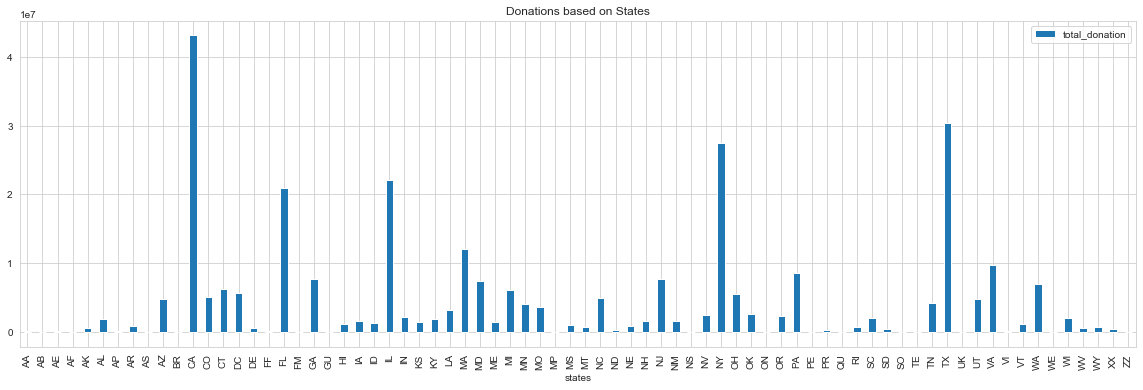

In [45]:
state_donations.plot.bar(x='states',y='total_donation',figsize=(20,6),title='Donations based on States')



In [46]:
state_donations['states'][11]

'CA'

In [47]:
state_donations['total_donation'][11]

43118223.680001035

In [48]:
np.where(state_donations['states'] == 'CA')

(array([11]),)

#### 2.) How did the donations differ between candidates?

In [49]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [50]:
candidates = donor_df['cand_nm'].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [51]:
party_map={
    'Bachmann, Michelle':'Republican',
    'Romney, Mitt':'Republican',
    'Obama, Barack':'Democrat',
    "Roemer, Charles E. 'Buddy' III":'Republican',
    'Pawlenty, Timothy':'Republican',
    'Johnson, Gary Earl':'Republican',
    'Paul, Ron':'Republican',
    'Santorum, Rick':'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt':'Republican',
    'McCotter, Thaddeus G':'Republican',
    'Huntsman, Jon':'Republican',
    'Perry, Rick':'Republican'
}

donor_df["party"] = donor_df['cand_nm'].map(party_map)

In [52]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [53]:
candidate_df = donor_df[['cand_nm','party','contb_receipt_amt']]

In [54]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001731 non-null  object 
 1   party              1001731 non-null  object 
 2   contb_receipt_amt  1001731 non-null  float64
dtypes: float64(1), object(2)
memory usage: 22.9+ MB


In [55]:
candidate_don_df = candidate_df.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index(name='candidate_donations')

In [56]:
candidate_don_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cand_nm              13 non-null     object 
 1   candidate_donations  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


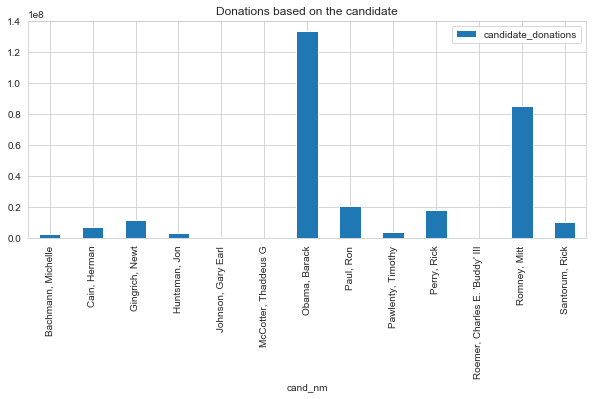

In [57]:
candidate_don_df.plot.bar(x='cand_nm',y='candidate_donations', figsize=(10,4), title= "Donations based on the candidate")

#### 3.) How did the donations differ between Democrats and Republicans?

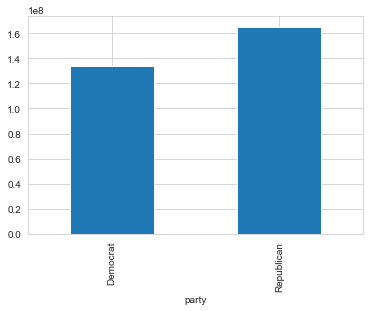

In [58]:
donor_df.groupby('party')['contb_receipt_amt'].sum().plot.bar()

#### 4.) What were the demographics of the donors?


In [59]:
## We will going to check the donor's occupations
occupation_df = donor_df.pivot_table('contb_receipt_amt', index ='contbr_occupation', columns='party',aggfunc='sum')

In [60]:
occupation_df.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [62]:
occupation_df.shape

(45073, 2)

In [63]:
## Just because there are over 45000 contributors, we will just check the big donations for visualization purposes
occupation_df = occupation_df[occupation_df.sum(1)>1000000]

In [64]:
occupation_df.shape

(31, 2)

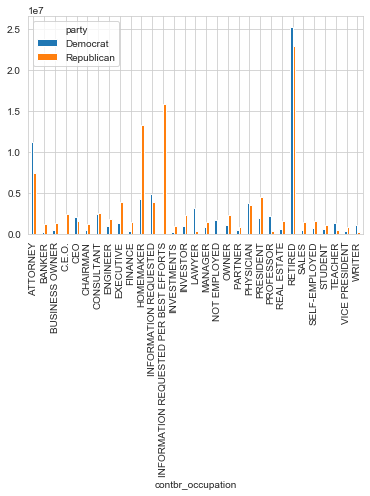

In [65]:
occupation_df.plot(kind='bar')

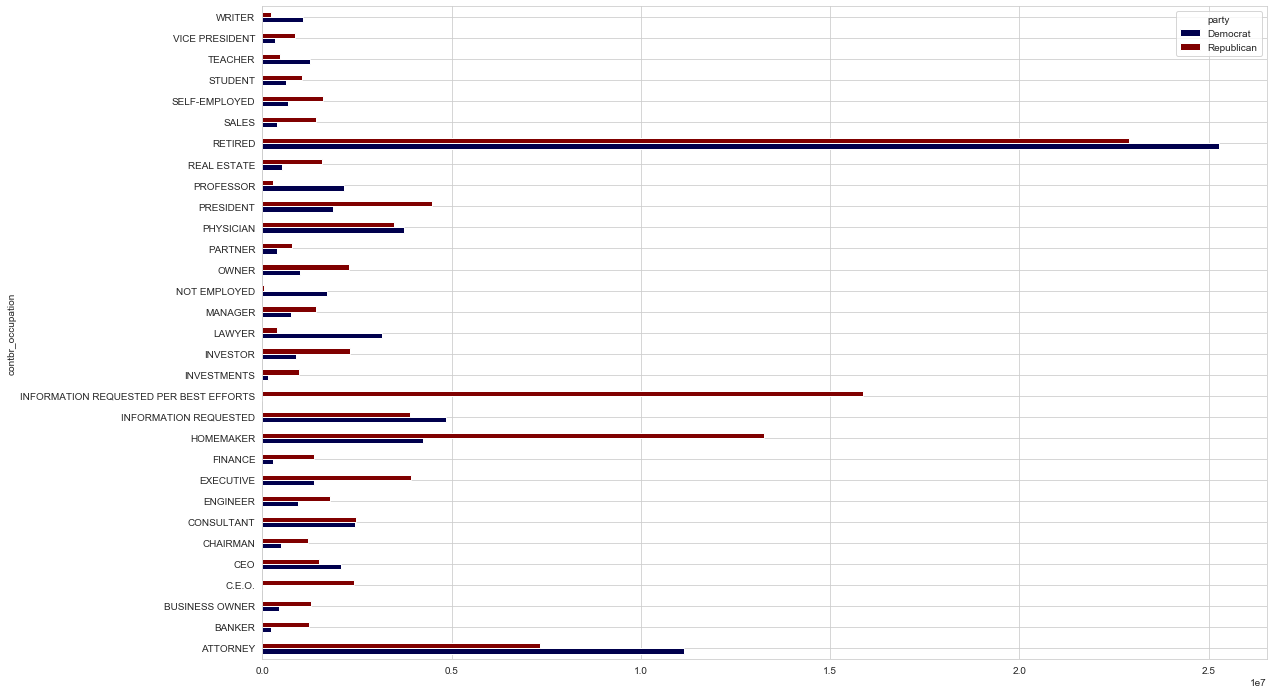

In [66]:
## it is hard to read above bar chart, so makie it horizontal (barh)
occupation_df.plot(kind='barh', figsize=(18,12),cmap='seismic')

In [67]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [69]:
## Now let's combine the CEO and C.E.O rows.
occupation_df.loc['CEO'] = occupation_df.loc["CEO"] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

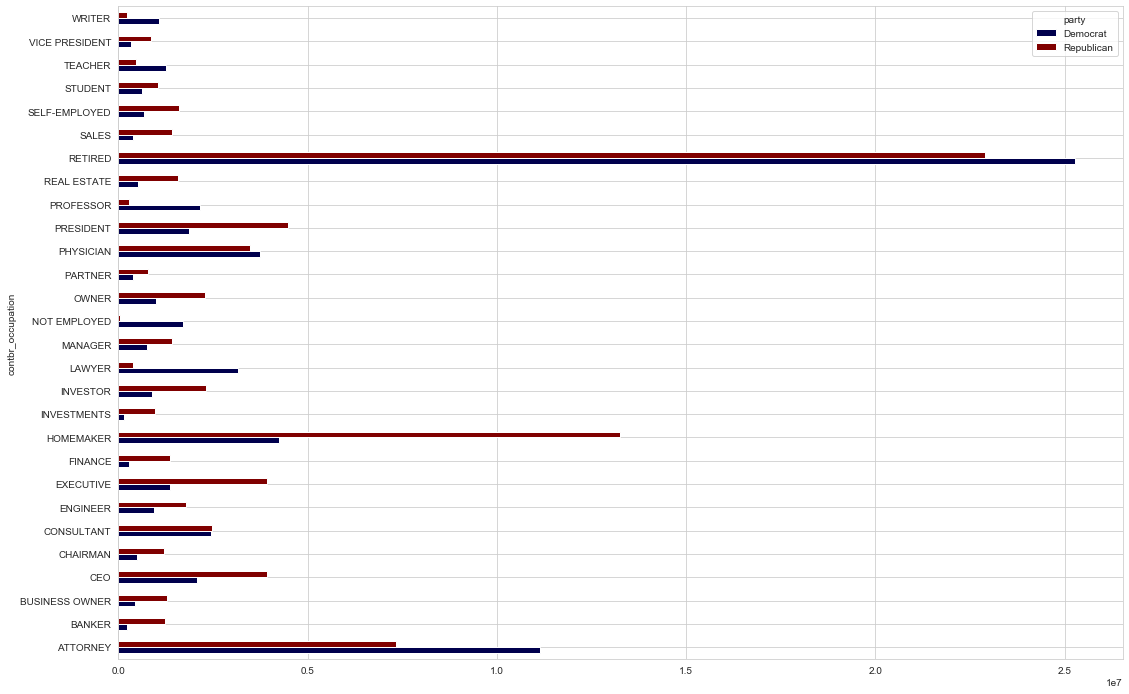

In [70]:
occupation_df.plot(kind='barh', figsize=(18,12),cmap='seismic')